In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup


import pandas as pd
import numpy as np

import re
import time

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
url='https://www.flipkart.com/search?q=fridge&sid=j9e%2Cabm%2Chzg&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=fridge%7CRefrigerators&requestId=f068ddf8-3054-474c-ac67-2442501defad&as-backfill=on&page=1'

In [4]:
url

'https://www.flipkart.com/search?q=fridge&sid=j9e%2Cabm%2Chzg&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=fridge%7CRefrigerators&requestId=f068ddf8-3054-474c-ac67-2442501defad&as-backfill=on&page=1'

In [1]:
# to check whether the website is allowing to scrap or not
#at the end of the url write- "/robots.txt"

In [5]:
p=requests.get(url)

In [6]:
p.status_code

200

In [7]:
pcontent=p.text

In [8]:
pcontent

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

In [9]:
p.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

In [10]:
soup=BeautifulSoup(pcontent)
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/appl

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

In [12]:
#main
main=soup.find_all('div',attrs={'class':'_3pLy-c row'})

In [13]:
main[0].text

'SAMSUNG 192 L Direct Cool Single Door 2 Star Refrigerator4.312,980 Ratings\xa0&\xa01,326 ReviewsLinear Compressor2 Star : For Energy savings up to 20%Toughened Glass Shelves192 L : Good for couples and small families2021 BEE Rating Year1 Year Warranty on Product and 10 Years on Compressor From Samsung₹12,290₹14,99018% offNo Cost EMIUpto ₹4,500 Off on Exchange'

In [14]:
#pname
soup.find_all('div',attrs={'class':'_4rR01T'})

[<div class="_4rR01T">SAMSUNG 192 L Direct Cool Single Door 2 Star Refrigerator</div>,
 <div class="_4rR01T">SAMSUNG 198 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer</div>,
 <div class="_4rR01T">SAMSUNG 198 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer</div>,
 <div class="_4rR01T">Haier 258 L Frost Free Double Door 3 Star Convertible Refrigerator</div>,
 <div class="_4rR01T">Whirlpool 190 L Direct Cool Single Door 2 Star Refrigerator</div>,
 <div class="_4rR01T">Haier 195 L Direct Cool Single Door 4 Star Refrigerator</div>,
 <div class="_4rR01T">LG 190 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer</div>,
 <div class="_4rR01T">Whirlpool 190 L Direct Cool Single Door 2 Star Refrigerator</div>,
 <div class="_4rR01T">SAMSUNG 253 L Frost Free Double Door 3 Star Convertible Refrigerator</div>,
 <div class="_4rR01T">LG 190 L Direct Cool Single Door 3 Star Refrigerator</div>,
 <div class="_4rR01T">LG 190 L Direct Cool Single Door 4 Star Refri

In [15]:
# loop for fname
for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
    fname = x.find('div', attrs={'class':'_4rR01T'})
    if fname is None:
        print(np.NaN)
    else:
        print(fname.text)

SAMSUNG 192 L Direct Cool Single Door 2 Star Refrigerator
SAMSUNG 198 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer
SAMSUNG 198 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer
Haier 258 L Frost Free Double Door 3 Star Convertible Refrigerator
Whirlpool 190 L Direct Cool Single Door 2 Star Refrigerator
Haier 195 L Direct Cool Single Door 4 Star Refrigerator
LG 190 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer
Whirlpool 190 L Direct Cool Single Door 2 Star Refrigerator
SAMSUNG 253 L Frost Free Double Door 3 Star Convertible Refrigerator
LG 190 L Direct Cool Single Door 3 Star Refrigerator
LG 190 L Direct Cool Single Door 4 Star Refrigerator with Base Drawer
LG 190 L Direct Cool Single Door 4 Star Refrigerator
Haier 190 L Direct Cool Single Door 2 Star Refrigerator
SAMSUNG 230 L Direct Cool Single Door 3 Star Refrigerator with Base Drawer
Whirlpool 190 L Direct Cool Single Door 4 Star Refrigerator
SAMSUNG 192 L Direct Cool Single Door 2 Sta

In [16]:
#price
soup.find_all('div',{'class':'_30jeq3 _1_WHN1'})


[<div class="_30jeq3 _1_WHN1">₹12,290</div>,
 <div class="_30jeq3 _1_WHN1">₹16,340</div>,
 <div class="_30jeq3 _1_WHN1">₹17,590</div>,
 <div class="_30jeq3 _1_WHN1">₹21,990</div>,
 <div class="_30jeq3 _1_WHN1">₹12,990</div>,
 <div class="_30jeq3 _1_WHN1">₹13,440</div>,
 <div class="_30jeq3 _1_WHN1">₹16,290</div>,
 <div class="_30jeq3 _1_WHN1">₹12,990</div>,
 <div class="_30jeq3 _1_WHN1">₹24,990</div>,
 <div class="_30jeq3 _1_WHN1">₹13,690</div>,
 <div class="_30jeq3 _1_WHN1">₹16,290</div>,
 <div class="_30jeq3 _1_WHN1">₹15,290</div>,
 <div class="_30jeq3 _1_WHN1">₹11,090</div>,
 <div class="_30jeq3 _1_WHN1">₹17,590</div>,
 <div class="_30jeq3 _1_WHN1">₹15,990</div>,
 <div class="_30jeq3 _1_WHN1">₹13,990</div>,
 <div class="_30jeq3 _1_WHN1">₹16,340</div>,
 <div class="_30jeq3 _1_WHN1">₹23,490</div>,
 <div class="_30jeq3 _1_WHN1">₹25,490</div>,
 <div class="_30jeq3 _1_WHN1">₹13,490</div>,
 <div class="_30jeq3 _1_WHN1">₹14,790</div>,
 <div class="_30jeq3 _1_WHN1">₹24,990</div>,
 <div clas

In [17]:
# loop for price
for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
    price = x.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
    if price is None:
        print(np.NaN)
    else:
        print(price.text)

₹12,290
₹16,340
₹17,590
₹21,990
₹12,990
₹13,440
₹16,290
₹12,990
₹24,990
₹13,690
₹16,290
₹15,290
₹11,090
₹17,590
₹15,990
₹13,990
₹16,340
₹23,490
₹25,490
₹13,490
₹14,790
₹24,990
₹9,590
₹13,890


In [18]:
soup.find('div',class_='_30jeq3 _1_WHN1').text

'₹12,290'

In [19]:
#rat
soup.find_all('div',attrs={'class':'_3LWZlK'})

[<div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1rdVr6 _1BLPMq">1</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LW

In [20]:
#loop for rating
for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
    rat = x.find('div', attrs={'class':'_3LWZlK'})
    if rat is None:
        print(np.NaN)
    else:
        print(rat.text)

4.3
4.5
4.5
4.4
4.3
4.4
4.4
4.3
4.3
4.5
4.5
4.4
4.2
4.4
4.3
4.4
4.4
4.4
4.3
4.3
4.4
4.4
4.4
4.3


In [21]:
#specs
soup.find_all('ul',attrs={'class':'_1xgFaf'})

[<ul class="_1xgFaf"><li class="rgWa7D">Linear Compressor</li><li class="rgWa7D">2 Star : For Energy savings up to 20%</li><li class="rgWa7D">Toughened Glass Shelves</li><li class="rgWa7D">192 L : Good for couples and small families</li><li class="rgWa7D">2021 BEE Rating Year</li><li class="rgWa7D">1 Year Warranty on Product and 10 Years on Compressor From Samsung</li></ul>,
 <ul class="_1xgFaf"><li class="rgWa7D">Digital Inverter Compressor</li><li class="rgWa7D">4 Star : For Energy savings up to 45%</li><li class="rgWa7D">Toughened Glass Shelves</li><li class="rgWa7D">198 L : Good for couples and small families</li><li class="rgWa7D">Built-in Stabilizer</li><li class="rgWa7D">2020 BEE Rating Year</li><li class="rgWa7D">1 Year on Product and 10 Years on Compressor From Samsung</li></ul>,
 <ul class="_1xgFaf"><li class="rgWa7D">Digital Inverter Compressor</li><li class="rgWa7D">5 Star : For Energy savings up to 55%</li><li class="rgWa7D">Toughened Glass Shelves</li><li class="rgWa7D">1

In [22]:
# loop for specificaions.
for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
    specs = x.find('ul', attrs={'class':'_1xgFaf'})
    if specs is None:
        print(np.NaN)
    else:
        print(specs.text)

Linear Compressor2 Star : For Energy savings up to 20%Toughened Glass Shelves192 L : Good for couples and small families2021 BEE Rating Year1 Year Warranty on Product and 10 Years on Compressor From Samsung
Digital Inverter Compressor4 Star : For Energy savings up to 45%Toughened Glass Shelves198 L : Good for couples and small familiesBuilt-in Stabilizer2020 BEE Rating Year1 Year on Product and 10 Years on Compressor From Samsung
Digital Inverter Compressor5 Star : For Energy savings up to 55%Toughened Glass Shelves198 L : Good for couples and small familiesBuilt-in Stabilizer2020 BEE Rating Year1 Year on Product and 10 Years on Compressor From Samsung
Inverter Compressor3 Star : For Energy savings up to 35%Toughened Glass Shelves258 L : Good for families of 3-5 membersBuilt-in Stabilizer2020 BEE Rating Year1 Year Warranty on Product and 10 Years on Compressor
Normal Compressor2 Star : For Energy savings up to 20%Toughened Glass Shelves190 L : Good for couples and small familiesBuilt-i

In [23]:
product_name=[]
rating=[]
prices=[]
specifications=[]
pagenum=[]
for i in range(1,24):
    start_time=time.time()
    url='https://www.flipkart.com/search?q=fridge&sid=j9e%2Cabm%2Chzg&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=fridge%7CRefrigerators&requestId=f068ddf8-3054-474c-ac67-2442501defad&as-backfill=on&page={}'.format(i)
    p=requests.get(url)
    pcontent=p.text
    soup = BeautifulSoup(pcontent)
    for x in soup.find_all('div',attrs={'class':'_3pLy-c row'}):
        fname=x.find('div',attrs={'class':'_4rR01T'})
        rat=x.find('div',attrs={'class':'_3LWZlK'})
        price=x.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
        specs=x.find('ul',attrs={'class':'_1xgFaf'})
        if fname is None :
            product_name.append(np.NaN)
        else:
            product_name.append(fname.text)
            
        if rat is None :
            rating.append(0)
        else :
            rating.append(rat.text)
        if price is None :
            prices.append(np.NaN)
        else :
            prices.append(price.text)
        if specs is None :
            specifications.append(np.NaN)
        else :
            specifications.append(specs.text)
        pagenum.append(i)
    print('page {} completed in {} seconds'.format(i,time.time()-start_time))



page 1 completed in 0.9124760627746582 seconds
page 2 completed in 0.7230303287506104 seconds
page 3 completed in 0.796544075012207 seconds
page 4 completed in 0.8512754440307617 seconds
page 5 completed in 0.872154712677002 seconds
page 6 completed in 0.7196786403656006 seconds
page 7 completed in 0.6972596645355225 seconds
page 8 completed in 0.8139731884002686 seconds
page 9 completed in 0.8601930141448975 seconds
page 10 completed in 0.7976589202880859 seconds
page 11 completed in 0.904043436050415 seconds
page 12 completed in 0.8200933933258057 seconds
page 13 completed in 0.8286120891571045 seconds
page 14 completed in 0.7598526477813721 seconds
page 15 completed in 0.9349136352539062 seconds
page 16 completed in 1.0987191200256348 seconds
page 17 completed in 0.7192254066467285 seconds
page 18 completed in 0.6673030853271484 seconds
page 19 completed in 0.8027355670928955 seconds
page 20 completed in 0.7988357543945312 seconds
page 21 completed in 0.7423992156982422 seconds
page

In [24]:
len(product_name)
len(pagenum)
len(rating)
len(prices)
len(specifications)

552

552

552

552

552

In [25]:
refridgerator_df = pd.DataFrame({'Product_Name':product_name,'Rating':rating,'Specifications':specifications,'Price':prices,'Page_No':pagenum})

In [26]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,"₹12,290",1
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,"₹16,340",1
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,"₹17,590",1
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,"₹21,990",1
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,"₹12,990",1
...,...,...,...,...,...
547,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,"₹18,490",23
548,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.5,Reciprocating Compressor2 Star : For Energy sa...,"₹12,190",23
549,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,"₹16,990",23
550,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,3.7,Digital Inverter Compressor4 Star : For Energy...,"₹17,190",23


In [27]:
refridgerator_df.isnull().sum()

Product_Name      0
Rating            0
Specifications    0
Price             0
Page_No           0
dtype: int64

## Regular Expressions :

In [28]:
# Extracting Brand from Product_Name
re.findall(r'^\w+',refridgerator_df['Product_Name'][0])

['SAMSUNG']

In [29]:
" ".join(re.findall(r'^\w+',refridgerator_df['Product_Name'][0]))

'SAMSUNG'

In [30]:
refridgerator_df['Brand']=refridgerator_df['Product_Name'].apply(lambda x:" ".join(re.findall(r'^\w+',x)))

In [31]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,"₹12,290",1,SAMSUNG
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,"₹16,340",1,SAMSUNG
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,"₹17,590",1,SAMSUNG
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,"₹21,990",1,Haier
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,"₹12,990",1,Whirlpool
...,...,...,...,...,...,...
547,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,"₹18,490",23,LG
548,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.5,Reciprocating Compressor2 Star : For Energy sa...,"₹12,190",23,Haier
549,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,"₹16,990",23,Haier
550,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,3.7,Digital Inverter Compressor4 Star : For Energy...,"₹17,190",23,SAMSUNG


In [32]:
refridgerator_df['Product_Name'][8]

'SAMSUNG 253 L Frost Free Double Door 3 Star Convertible Refrigerator'

In [33]:
refridgerator_df['Brand'].value_counts()

Whirlpool    167
SAMSUNG      127
LG           100
Haier         56
Godrej        50
Panasonic      9
Hitachi        7
BOSCH          6
MarQ           5
Voltas         4
Midea          4
MOTOROLA       4
Sansui         3
Onida          2
MITASHI        2
Croma          1
Hisense        1
Lifelong       1
Motorola       1
TOSHIBA        1
CANDY          1
Name: Brand, dtype: int64

In [34]:
refridgerator_df['Specifications'][2]

'Digital Inverter Compressor5 Star : For Energy savings up to 55%Toughened Glass Shelves198 L : Good for couples and small familiesBuilt-in Stabilizer2020 BEE Rating Year1 Year on Product and 10 Years on Compressor From Samsung'

In [35]:
# extracting  power saving in % from specifications
re.findall(r'[0-9]+[%]',refridgerator_df['Specifications'][2])

['55%']

In [36]:
" ".join(re.findall(r'[0-9]+[%]',refridgerator_df['Specifications'][2]))

'55%'

In [37]:
refridgerator_df['P_Saving_Percent']=refridgerator_df['Specifications'].apply(lambda x:" ".join(re.findall(r'[0-9]+[%]',x)))

In [38]:
# extraacting star from specifications
re.findall(r'[0-9][\s]+Star',refridgerator_df['Specifications'][0])

['2 Star']

In [39]:
" ".join(re.findall(r'[0-9][\s]+Star',refridgerator_df['Specifications'][0]))

'2 Star'

In [40]:
refridgerator_df['Star']=refridgerator_df['Specifications'].apply(lambda x :" ".join(re.findall(r'[0-9][\s]+Star',x)))

In [41]:
# extracting Warranty years from specifications
re.findall(r'[0-9]+[\s]+Years',refridgerator_df['Specifications'][0])

['10 Years']

In [42]:
" ".join(re.findall(r'[0-9]+[\s]+Years',refridgerator_df['Specifications'][0]))

'10 Years'

In [43]:
refridgerator_df['Warranty_Years']=refridgerator_df['Specifications'].apply(lambda x : " ".join(re.findall(r'[0-9]+[\s]+Years',x)))

In [44]:
# extracting Door_type from specifications
refridgerator_df['Product_Name'][0]

'SAMSUNG 192 L Direct Cool Single Door 2 Star Refrigerator'

In [45]:
re.findall(r'[A-Za-z]+[\s]+Door',refridgerator_df['Product_Name'][0])

['Single Door']

In [46]:
" ".join(re.findall(r'[A-Za-z]+[\s]+Door',refridgerator_df['Product_Name'][0]))

'Single Door'

In [47]:
refridgerator_df['Door_Type']=refridgerator_df['Product_Name'].apply(lambda x: " ".join(re.findall(r'[A-Za-z]+[\s]+Door',x)))

In [48]:
# extracting liters from specifications
re.findall(r'[0-9]+[\s]+L',refridgerator_df['Specifications'][2])

['198 L']

In [49]:
" ".join(re.findall(r'[0-9]+[\s]+L',refridgerator_df['Specifications'][2]))

'198 L'

In [50]:
refridgerator_df['Liters']=refridgerator_df['Specifications'].apply(lambda x: " ".join(re.findall(r'[0-9]+[\s]+L',x)))

In [51]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,"₹12,290",1,SAMSUNG,20%,2 Star,10 Years,Single Door,192 L
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,"₹16,340",1,SAMSUNG,45%,4 Star,10 Years,Single Door,198 L
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,"₹17,590",1,SAMSUNG,55%,5 Star,10 Years,Single Door,198 L
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,"₹21,990",1,Haier,35%,3 Star,10 Years,Double Door,258 L
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,"₹12,990",1,Whirlpool,20%,2 Star,10 Years,Single Door,190 L
...,...,...,...,...,...,...,...,...,...,...,...
547,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,"₹18,490",23,LG,45%,4 Star,10 Years,Single Door,215 L
548,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.5,Reciprocating Compressor2 Star : For Energy sa...,"₹12,190",23,Haier,20%,2 Star,10 Years,Single Door,192 L
549,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,"₹16,990",23,Haier,45%,4 Star,10 Years,Single Door Glass Door,195 L
550,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,3.7,Digital Inverter Compressor4 Star : For Energy...,"₹17,190",23,SAMSUNG,45%,4 Star,10 Years,Single Door,198 L


### pickling

In [52]:
import joblib

joblib.dump(refridgerator_df,"D:\\data science\\web scraping\\refridgerator_df.pkl")

['D:\\data science\\web scraping\\refridgerator_df.pkl']

In [53]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,"₹12,290",1,SAMSUNG,20%,2 Star,10 Years,Single Door,192 L
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,"₹16,340",1,SAMSUNG,45%,4 Star,10 Years,Single Door,198 L
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,"₹17,590",1,SAMSUNG,55%,5 Star,10 Years,Single Door,198 L
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,"₹21,990",1,Haier,35%,3 Star,10 Years,Double Door,258 L
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,"₹12,990",1,Whirlpool,20%,2 Star,10 Years,Single Door,190 L
...,...,...,...,...,...,...,...,...,...,...,...
547,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,"₹18,490",23,LG,45%,4 Star,10 Years,Single Door,215 L
548,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.5,Reciprocating Compressor2 Star : For Energy sa...,"₹12,190",23,Haier,20%,2 Star,10 Years,Single Door,192 L
549,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,"₹16,990",23,Haier,45%,4 Star,10 Years,Single Door Glass Door,195 L
550,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,3.7,Digital Inverter Compressor4 Star : For Energy...,"₹17,190",23,SAMSUNG,45%,4 Star,10 Years,Single Door,198 L


## Data cleaning

In [54]:
# Type of columns

In [55]:
refridgerator_df.Brand[0]
type(refridgerator_df.Brand[0])

'SAMSUNG'

str

In [56]:
refridgerator_df.Star[0]
type(refridgerator_df.Star[0])

'2 Star'

str

In [57]:
refridgerator_df.Price[0]
type(refridgerator_df.Price[0])

'₹12,290'

str

In [58]:
refridgerator_df.columns

Index(['Product_Name', 'Rating', 'Specifications', 'Price', 'Page_No', 'Brand',
       'P_Saving_Percent', 'Star', 'Warranty_Years', 'Door_Type', 'Liters'],
      dtype='object')

In [59]:
categorical=refridgerator_df.select_dtypes(include=["object"]).columns
categorical

Index(['Product_Name', 'Rating', 'Specifications', 'Price', 'Brand',
       'P_Saving_Percent', 'Star', 'Warranty_Years', 'Door_Type', 'Liters'],
      dtype='object')

In [60]:
Numerical=refridgerator_df.select_dtypes(include=["number"]).columns
Numerical

Index(['Page_No'], dtype='object')

In [61]:
refridgerator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Name      552 non-null    object
 1   Rating            552 non-null    object
 2   Specifications    552 non-null    object
 3   Price             552 non-null    object
 4   Page_No           552 non-null    int64 
 5   Brand             552 non-null    object
 6   P_Saving_Percent  552 non-null    object
 7   Star              552 non-null    object
 8   Warranty_Years    552 non-null    object
 9   Door_Type         552 non-null    object
 10  Liters            552 non-null    object
dtypes: int64(1), object(10)
memory usage: 47.6+ KB


In [62]:
#Data cleaning

In [63]:
refridgerator_df.Brand = refridgerator_df.Brand.apply(lambda x:''.join(x))
#refridgerator_df.Price = refridgerator_df.Price.apply(lambda x:''.join(x))
refridgerator_df.Star = refridgerator_df.Star.apply(lambda x:''.join(x))
refridgerator_df.Warranty_Years = refridgerator_df.Warranty_Years.apply(lambda x:''.join(x))
refridgerator_df.Door_Type = refridgerator_df.Door_Type.apply(lambda x:''.join(x))
refridgerator_df.Liters = refridgerator_df.Liters.apply(lambda x:''.join(x))
refridgerator_df.P_Saving_Percent = refridgerator_df.P_Saving_Percent.apply(lambda x:''.join(x))

In [64]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,"₹12,290",1,SAMSUNG,20%,2 Star,10 Years,Single Door,192 L
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,"₹16,340",1,SAMSUNG,45%,4 Star,10 Years,Single Door,198 L
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,"₹17,590",1,SAMSUNG,55%,5 Star,10 Years,Single Door,198 L
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,"₹21,990",1,Haier,35%,3 Star,10 Years,Double Door,258 L
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,"₹12,990",1,Whirlpool,20%,2 Star,10 Years,Single Door,190 L
...,...,...,...,...,...,...,...,...,...,...,...
547,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,"₹18,490",23,LG,45%,4 Star,10 Years,Single Door,215 L
548,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.5,Reciprocating Compressor2 Star : For Energy sa...,"₹12,190",23,Haier,20%,2 Star,10 Years,Single Door,192 L
549,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,"₹16,990",23,Haier,45%,4 Star,10 Years,Single Door Glass Door,195 L
550,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,3.7,Digital Inverter Compressor4 Star : For Energy...,"₹17,190",23,SAMSUNG,45%,4 Star,10 Years,Single Door,198 L


In [65]:
# replacing ('₹','').

In [66]:
float(refridgerator_df.Price[0].replace('₹','').replace(',',''))

12290.0

In [67]:
refridgerator_df['Price'] = refridgerator_df['Price'].apply(lambda x: x.replace('₹','').replace(',','')).astype(float)

In [68]:
# in Star, replacing 'star'---""
float(refridgerator_df.Star[0].replace('Star',''))

2.0

In [69]:
refridgerator_df['Star']=refridgerator_df['Star'].apply(lambda x: x.replace('Star',''))

In [70]:
# in liters, replacing 'L'--''
float(refridgerator_df.Liters[0].replace('L',''))

192.0

In [71]:
refridgerator_df['Liters']=refridgerator_df['Liters'].apply(lambda x: x.replace('L',''))

In [72]:
(refridgerator_df.P_Saving_Percent[0].replace('%',''))

'20'

In [73]:
refridgerator_df['P_Saving_Percent']=refridgerator_df['P_Saving_Percent'].apply(lambda x: x.replace('%',''))

In [74]:
refridgerator_df['Warranty_Years']=refridgerator_df['Warranty_Years'].apply(lambda x: x.replace('Years',''))

In [75]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16340.0,1,SAMSUNG,45,4,10,Single Door,198
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,21990.0,1,Haier,35,3,10,Double Door,258
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,12990.0,1,Whirlpool,20,2,10,Single Door,190
...,...,...,...,...,...,...,...,...,...,...,...
547,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,18490.0,23,LG,45,4,10,Single Door,215
548,Haier 192 L Direct Cool Single Door 2 Star Ref...,4.5,Reciprocating Compressor2 Star : For Energy sa...,12190.0,23,Haier,20,2,10,Single Door,192
549,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,16990.0,23,Haier,45,4,10,Single Door Glass Door,195
550,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,3.7,Digital Inverter Compressor4 Star : For Energy...,17190.0,23,SAMSUNG,45,4,10,Single Door,198


In [76]:
per=[]
for i in refridgerator_df['P_Saving_Percent']:
    if i=="":
        per.append(29)
    else:
        per.append(i)

In [77]:
per

['20',
 '45',
 '55',
 '35',
 '20',
 '45',
 '45',
 '20',
 '35',
 '35',
 '45',
 '45',
 '20',
 '35',
 '45',
 '20',
 '45',
 '35',
 '35',
 '35',
 '35',
 29,
 '20',
 '35',
 29,
 '35',
 '35',
 '20',
 '35',
 '20',
 '45',
 '35',
 '20',
 '45',
 '45',
 '35',
 '35',
 '35',
 '55',
 '35',
 '20',
 '20',
 '20',
 '35',
 '35',
 '20',
 29,
 29,
 '45',
 '35',
 '20',
 '35',
 '20',
 29,
 '20',
 '35',
 '20',
 '20',
 '55',
 '35',
 '20',
 '20',
 '35',
 '35',
 '35',
 '20',
 '20',
 '55',
 29,
 '35',
 '55',
 '20',
 '20',
 '35',
 '20',
 '35',
 '20',
 '20',
 29,
 29,
 '45',
 '35',
 '45',
 '45',
 '35',
 29,
 '45',
 '35',
 '20',
 '35',
 29,
 '45',
 '35',
 '20',
 '35',
 '55',
 '35',
 '20',
 '45',
 '20',
 '35',
 29,
 '20',
 '20',
 '45',
 '20',
 '35',
 '35',
 '35',
 '45',
 '55',
 '45',
 29,
 '20',
 '35',
 '20',
 '35',
 '35',
 29,
 '35',
 '20',
 '35',
 '20',
 '55',
 '45',
 '45',
 '20',
 '35',
 '45',
 '35',
 '20',
 '20',
 '20',
 29,
 '20',
 '45',
 '45',
 '35',
 '35',
 '35',
 '45',
 '35',
 '45',
 '55',
 29,
 '35',
 '35',
 

In [78]:
refridgerator_df['P_Saving_Percent']=per

In [79]:
refridgerator_df['P_Saving_Percent'].value_counts()

35    212
20    159
45     94
29     57
55     30
Name: P_Saving_Percent, dtype: int64

In [354]:
# appending null values with mean

In [351]:
refridgerator_df['Rating'] = refridgerator_df['Rating'].astype('float')
round(refridgerator_df['Rating'].mean(),1)

3.7

In [352]:
a=[]
for i in refridgerator_df['Rating']:
    if i==(0):
        a.append(3.7)
    else:
        a.append(i)

In [353]:
a

[4.3,
 4.5,
 4.5,
 4.4,
 4.5,
 4.2,
 4.4,
 4.3,
 4.4,
 4.4,
 4.5,
 4.3,
 4.3,
 4.4,
 4.3,
 4.4,
 4.4,
 4.3,
 4.4,
 4.3,
 4.4,
 4.4,
 4.3,
 4.3,
 4.3,
 4.4,
 4.4,
 4.4,
 4.3,
 4.3,
 4.4,
 4.3,
 4.4,
 4.5,
 4.4,
 4.4,
 4.4,
 4.3,
 4.5,
 4.4,
 4.2,
 4.4,
 4.4,
 4.6,
 4.5,
 4.3,
 4.3,
 4.3,
 4.2,
 4.4,
 4.3,
 4.3,
 4.4,
 4.4,
 4.3,
 4.3,
 4.3,
 4.2,
 4.4,
 4.5,
 4.4,
 4.3,
 4.4,
 4.3,
 4.3,
 4.4,
 4.3,
 4.4,
 4.3,
 4.2,
 4.3,
 4.4,
 4.4,
 4.4,
 4.3,
 4.3,
 4.4,
 4.4,
 4.4,
 4.4,
 4.3,
 4.3,
 4.3,
 4.2,
 4.2,
 4.3,
 4.3,
 4.3,
 4.3,
 4.5,
 4.3,
 4.3,
 4.3,
 4.3,
 4.4,
 4.3,
 4.4,
 4.5,
 4.3,
 4.3,
 4.4,
 4.4,
 4.4,
 4.4,
 4.3,
 4.4,
 3.7,
 4.3,
 4.2,
 4.3,
 4.4,
 4.6,
 4.4,
 4.5,
 4.3,
 3.7,
 4.4,
 4.2,
 4.4,
 4.3,
 4.3,
 4.4,
 4.3,
 4.5,
 4.3,
 4.4,
 4.4,
 4.1,
 4.4,
 4.5,
 4.4,
 4.5,
 4.7,
 4.3,
 4.4,
 4.3,
 4.3,
 4.5,
 4.3,
 4.5,
 4.3,
 4.4,
 4.4,
 4.4,
 4.3,
 4.3,
 3.7,
 4.4,
 4.4,
 4.4,
 4.1,
 4.4,
 4.0,
 4.2,
 4.5,
 4.3,
 4.3,
 4.4,
 3.7,
 4.4,
 4.5,
 4.3,
 4.0,
 4.4,
 4.3,
 4.3,
 4.4

In [355]:
refridgerator_df['Rating']=a

In [373]:
# appending np.nan in empty space in Door_Type
d=[]
for i in refridgerator_df["Door_Type"]:
    if i=='':
        d.append(np.NaN)
    else:
        d.append(i)

In [374]:
d

['Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Triple Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Triple Door',
 'Triple Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Double Door',
 'Single Door',
 'Single Door',
 'Double Door',
 'Triple

In [361]:
refridgerator_df["Door_Type"]=d

In [369]:
refridgerator_df["Door_Type"].value_counts()

Single Door               280
Double Door               215
Triple Door                12
Double Door Glass Door      3
with Door                   2
Single Door Glass Door      2
French Door                 2
French Door Four Door       1
Double Door with Door       1
Four Door                   1
Name: Door_Type, dtype: int64

In [364]:
# appending empty space with 0 in Star
s=[]
for x in refridgerator_df['Star']:
    if x=='':
        s.append(0)
    else:
        s.append(x)

In [365]:
s

['2 ',
 '4 ',
 '5 ',
 '4 ',
 '4 ',
 '2 ',
 '4 ',
 '3 ',
 '3 ',
 '4 ',
 '3 ',
 '2 ',
 '2 ',
 '3 ',
 '4 ',
 '2 ',
 '2 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '4 ',
 '3 ',
 '2 ',
 '1 ',
 '4 ',
 '3 ',
 '2 ',
 '3 ',
 '2 ',
 0,
 '3 ',
 '2 ',
 '5 ',
 '2 ',
 '4 ',
 '3 ',
 '2 ',
 '3 ',
 '3 ',
 '3 ',
 0,
 0,
 '4 ',
 '4 ',
 '3 ',
 '4 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '2 ',
 '2 ',
 '4 ',
 '2 ',
 '3 ',
 '2 ',
 '3 ',
 '4 ',
 '4 ',
 '2 ',
 0,
 '2 ',
 '3 ',
 '5 ',
 '2 ',
 '2 ',
 '2 ',
 '3 ',
 '3 ',
 '5 ',
 0,
 '5 ',
 '3 ',
 '3 ',
 '5 ',
 0,
 '3 ',
 '4 ',
 '2 ',
 '3 ',
 '2 ',
 '2 ',
 '4 ',
 '2 ',
 '3 ',
 '2 ',
 '3 ',
 '1 ',
 '4 ',
 '2 ',
 '3 ',
 '3 ',
 '2 ',
 '2 ',
 0,
 '2 ',
 '2 ',
 '2 ',
 '2 ',
 '4 ',
 '3 ',
 '2 ',
 '4 ',
 '2 ',
 '3 ',
 '3 ',
 '2 ',
 '3 ',
 '3 ',
 '4 ',
 0,
 0,
 '2 ',
 '5 ',
 '2 ',
 '3 ',
 '3 ',
 '2 ',
 '3 ',
 '4 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '2 ',
 0,
 '5 ',
 '4 ',
 '3 ',
 0,
 '4 ',
 '2 ',
 '4 ',
 '2 ',
 '3 ',
 '4 ',
 '3 ',
 0,
 '4 ',
 '5 ',
 '4 ',
 '2 ',
 '3 ',
 '3 ',
 '5 ',
 '3 ',


In [366]:
refridgerator_df['Star']=s

In [368]:
refridgerator_df.isnull().sum()

Product_Name         0
Rating               0
Specifications       0
Price                0
Page_No              0
Brand                0
P_Saving_Percent     0
Star                 0
Warranty_Years       0
Door_Type           33
Liters               0
dtype: int64

In [402]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192.0
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16150.0,1,SAMSUNG,45,4,10,Single Door,198.0
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198.0
3,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,13440.0,1,Haier,45,4,10,Single Door,195.0
4,LG 190 L Direct Cool Single Door 4 Star Refrig...,4.5,Smart Inverter Compressor4 Star : For Energy s...,15990.0,1,LG,45,4,10,Single Door,190.0
...,...,...,...,...,...,...,...,...,...,...,...
547,Whirlpool 500 L Frost Free Double Door 3 Star ...,4.3,Intellisense Inverter3 Star : For Energy savin...,53990.0,23,Whirlpool,35,3,10,Double Door,500.0
548,LG 260 L Frost Free Double Door 2 Star Convert...,3.7,Smart Inverter Compressor2 Star : For Energy s...,24990.0,23,LG,20,2,10,Double Door,260.0
549,Whirlpool 200 L Direct Cool Single Door 3 Star...,4.2,Normal Compressor3 Star : For Energy savings u...,13990.0,23,Whirlpool,35,3,10,Single Door,200.0
550,Midea 661 L Frost Free Side by Side Refrigerator,5.0,DC Inverter CompressorToughened Glass Shelves6...,62990.0,23,Midea,29,0,10,NaN,661.0


In [382]:
refridgerator_df.to_csv("D:\\data science\\web scraping\\refridgerator_df.csv")

In [384]:
refridgerator_df.head(4)

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16150.0,1,SAMSUNG,45,4,10,Single Door,198
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198
3,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,13440.0,1,Haier,45,4,10,Single Door,195


In [376]:
refridgerator_df['Rating'].value_counts()

4.4    142
4.3    133
3.7     90
4.2     44
4.5     43
4.0     19
4.6     15
4.1     13
4.7     13
5.0     13
3.8      9
4.8      7
3.9      7
3.4      1
3.6      1
3.2      1
4.9      1
Name: Rating, dtype: int64

In [377]:
refridgerator_df['P_Saving_Percent'].value_counts()

35    206
20    167
45     94
29     57
55     28
Name: P_Saving_Percent, dtype: int64

In [2]:
# to read the csv  saved data
refridgerator_df=pd.read_csv("D:\\data science\\web scraping\\refridgerator_df.csv")

In [3]:
refridgerator_df

,Unnamed: 0,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192.0
1,1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16150.0,1,SAMSUNG,45,4,10,Single Door,198.0
2,2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198.0
3,3,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,13440.0,1,Haier,45,4,10,Single Door,195.0
4,4,LG 190 L Direct Cool Single Door 4 Star Refrig...,4.5,Smart Inverter Compressor4 Star : For Energy s...,15990.0,1,LG,45,4,10,Single Door,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,Whirlpool 500 L Frost Free Double Door 3 Star ...,4.3,Intellisense Inverter3 Star : For Energy savin...,53990.0,23,Whirlpool,35,3,10,Double Door,500.0
548,548,LG 260 L Frost Free Double Door 2 Star Convert...,3.7,Smart Inverter Compressor2 Star : For Energy s...,24990.0,23,LG,20,2,10,Double Door,260.0
549,549,Whirlpool 200 L Direct Cool Single Door 3 Star...,4.2,Normal Compressor3 Star : For Energy savings u...,13990.0,23,Whirlpool,35,3,10,Single Door,200.0
550,550,Midea 661 L Frost Free Side by Side Refrigerator,5.0,DC Inverter CompressorToughened Glass Shelves6...,62990.0,23,Midea,29,0,10,NaN,661.0


In [4]:
refridgerator_df=refridgerator_df.drop(['Unnamed: 0'],axis=1)

In [17]:
refridgerator_df.head(4)

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192.0
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16150.0,1,SAMSUNG,45,4,10,Single Door,198.0
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198.0
3,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,13440.0,1,Haier,45,4,10,Single Door,195.0


In [6]:
refridgerator_df.to_csv("D:\\data science\\web scraping\\refridgerator_df.csv")

In [110]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,"₹12,290",1,SAMSUNG,20,2,10,Single Door,192
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,"₹16,340",1,SAMSUNG,45,4,10,Single Door,198
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,"₹17,590",1,SAMSUNG,55,5,10,Single Door,198
3,Haier 258 L Frost Free Double Door 3 Star Conv...,4.4,Inverter Compressor3 Star : For Energy savings...,"₹21,990",1,Haier,35,3,10,Double Door,258
4,Whirlpool 190 L Direct Cool Single Door 2 Star...,4.3,Normal Compressor2 Star : For Energy savings u...,"₹12,990",1,Whirlpool,20,2,10,Single Door,190
...,...,...,...,...,...,...,...,...,...,...,...
547,LG 260 L Frost Free Double Door 3 Star Refrige...,4.4,Smart Inverter Compressor3 Star : For Energy s...,"₹27,499",23,LG,35,3,5,Double Door,260
548,SAMSUNG 253 L Frost Free Double Door 3 Star Co...,0,Digital Inverter Compressor3 Star : For Energy...,"₹28,200",23,SAMSUNG,35,3,10,Double Door,253
549,LG 215 L Direct Cool Single Door 4 Star Refrig...,4.4,Smart Inverter Compressor4 Star : For Energy s...,"₹18,490",23,LG,45,4,10,Single Door,215
550,Panasonic 601 L Frost Free Multi-Door 3 Star R...,0,INVERTER3 Star : For Energy savings up to 35%T...,"₹94,956",23,Panasonic,35,3,,,601


## Data Visualizations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [595]:
#sns.boxplot(x="Brand", y="Price", data=refridgerator_df)
#plt.title('Profit Brand')
#plt.ylabel('Price')
#plt.xlabel('Brand')
#plt.xticks(rotation = 90)
#plt.show()

In [596]:
# Numerical vs Categorical

In [472]:
refridgerator_df

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192.0
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16150.0,1,SAMSUNG,45,4,10,Single Door,198.0
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198.0
3,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,13440.0,1,Haier,45,4,10,Single Door,195.0
4,LG 190 L Direct Cool Single Door 4 Star Refrig...,4.5,Smart Inverter Compressor4 Star : For Energy s...,15990.0,1,LG,45,4,10,Single Door,190.0
...,...,...,...,...,...,...,...,...,...,...,...
547,Whirlpool 500 L Frost Free Double Door 3 Star ...,4.3,Intellisense Inverter3 Star : For Energy savin...,53990.0,23,Whirlpool,35,3,10,Double Door,500.0
548,LG 260 L Frost Free Double Door 2 Star Convert...,3.7,Smart Inverter Compressor2 Star : For Energy s...,24990.0,23,LG,20,2,10,Double Door,260.0
549,Whirlpool 200 L Direct Cool Single Door 3 Star...,4.2,Normal Compressor3 Star : For Energy savings u...,13990.0,23,Whirlpool,35,3,10,Single Door,200.0
550,Midea 661 L Frost Free Side by Side Refrigerator,5.0,DC Inverter CompressorToughened Glass Shelves6...,62990.0,23,Midea,29,0,10,NaN,661.0


## univariate

In [841]:
# univariate non-graphical methods

### Basic plot of the brand

<AxesSubplot:>

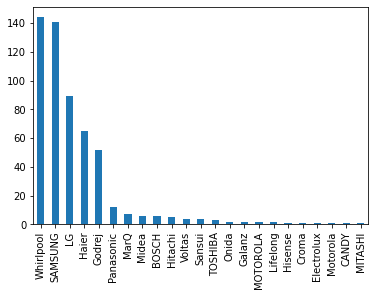

In [407]:
# for Brand
refridgerator_df["Brand"].value_counts().plot.bar()

In [843]:
# univariate graphical methods

### Insights :
### In this countplot we can  see the counts of the brand products and which brand as the highest counts and which has the lowest.

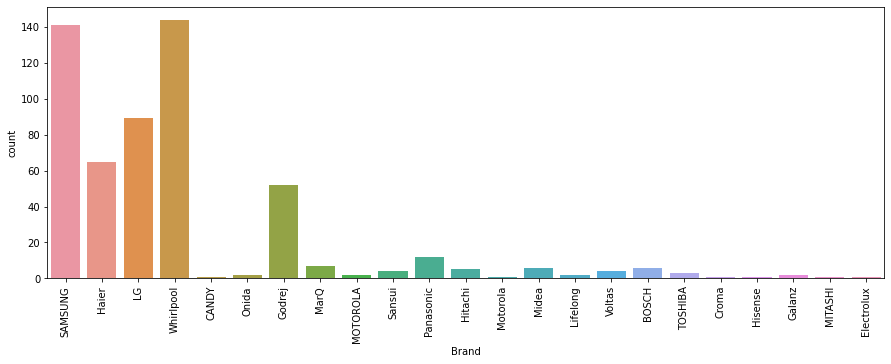

In [408]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(refridgerator_df.Brand);

### Insights
### In this countplot we plotted the graph on Door_type. in this we can observe that `single door ` and `double door` has the highest counts and remaining have less counts.

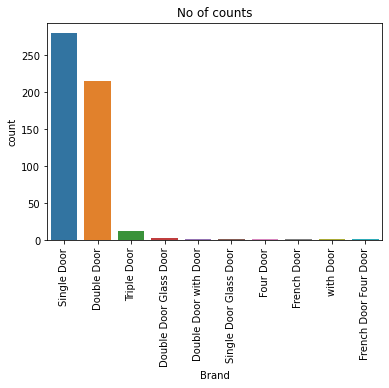

In [470]:
# countplot for Door_Type
sns.countplot(x="Door_Type",data=refridgerator_df)
plt.title('No of counts')
plt.xlabel('Brand')
plt.xticks(rotation=90);

### Insights
### In this plot we plotted graph on `p_saving_percent`. In this energy saving has highest in range of 30% to 40%. most of the products have  35% of energy saving. this plot shows the counts of  energy saving in percentage.

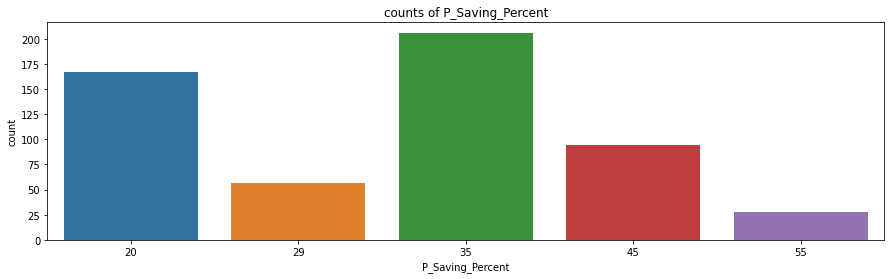

In [29]:
# P_Saving_Percentage
plt.figure(figsize=(15,4))
sns.countplot(refridgerator_df.P_Saving_Percent)
plt.title('counts of P_Saving_Percent');

### Insights
### Histogram plot is similar to bar plot.in this we plotted the graph on `Star`.
### In this we are showing the star rating of the product and which star has the highest counts.the star represents the power consumption of the product.
### 3star has the highest counts and 1 star has the lowest.

(array([ 50.,   0.,   7.,   0., 167.,   0., 206.,   0.,  94.,  28.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'range of star')

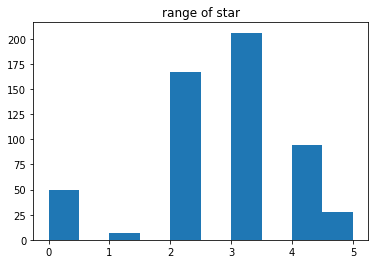

In [30]:
# histogram for star
plt.hist(refridgerator_df['Star'])
plt.title('range of star') 

### Insights
### Histogram plot on `Price`. In this we are observing the count of the product prices.

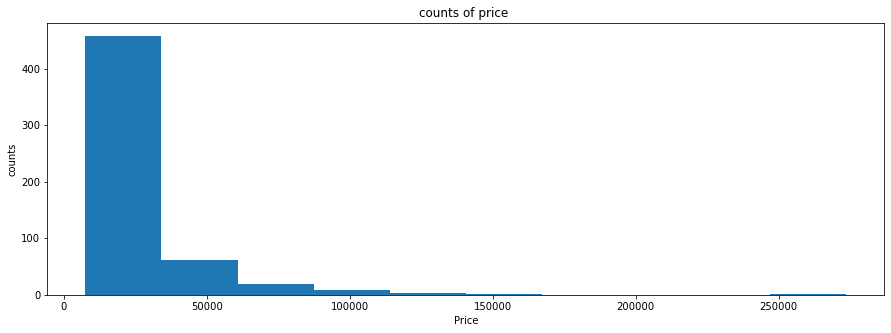

In [31]:
# histogram for price
plt.figure(figsize=(15,5))
plt.xlabel('Price')
plt.ylabel('counts')
plt.title('counts of price ')
plt.hist(refridgerator_df['Price']);

### Insights
### Displot on `Brand`. which shows the counts of the brand.

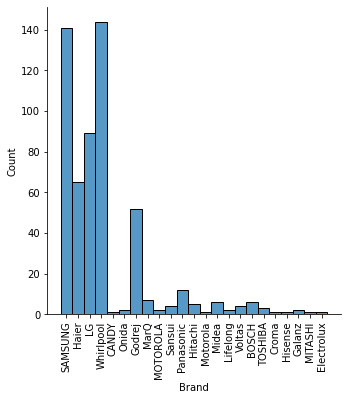

In [420]:
# displot for Brand
sns.displot(refridgerator_df.Brand)
plt.xticks(rotation = 90);

### Insights
###  distplot on `Price`.which shows the price range.

<AxesSubplot:xlabel='Price'>

Text(0.5, 1.0, 'highest price range')

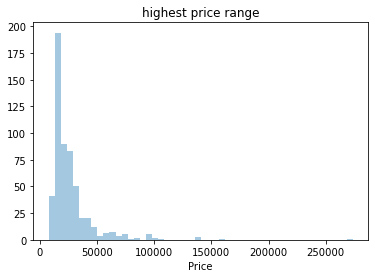

In [475]:
# distplot for Price
sns.distplot(refridgerator_df["Price"],kde=False)
plt.title('highest price range')
plt.show()

### Insights
### Distplot on `Rating`.in this we observes that the rating is high lies between 4.25 to 4.40 and next lies between 3.60 to 3.65.

<AxesSubplot:xlabel='Rating'>

Text(0.5, 1.0, 'Highest Ratings')

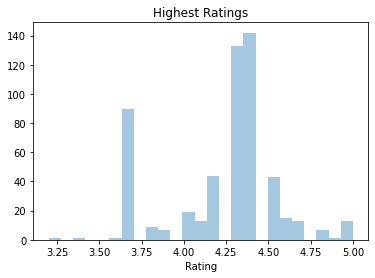

In [476]:
# distplot  for Rating 
# in this '3.4' is mean of Rating.
sns.distplot(refridgerator_df["Rating"],kde=False)
plt.title('Highest Ratings')
plt.show()

### Insights
### plotting the graph by using distplot on `P_Saving_Percent`.  It shows the density of the power saving in percentage and how the graph is obtained.

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='P_Saving_Percent', ylabel='Density'>

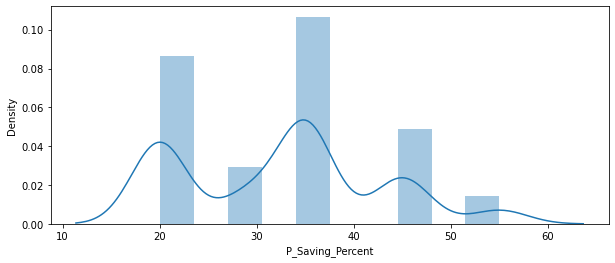

In [423]:
plt.figure(figsize=(10,4))
sns.distplot(refridgerator_df.P_Saving_Percent)

<AxesSubplot:xlabel='Star', ylabel='Density'>

Text(0.5, 1.0, 'Highest Star')

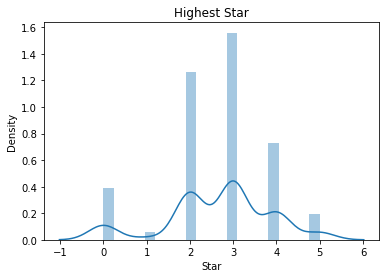

In [424]:
sns.distplot(refridgerator_df2['Star'],kde=True)
plt.title('Highest Star')
plt.show()

In [425]:
refridgerator_df['Price'].describe()

count       552.000000
mean      26603.376812
std       21408.979591
min        7590.000000
25%       15447.500000
50%       20210.000000
75%       29490.000000
max      273690.000000
Name: Price, dtype: float64

### Insights
### plotting the graph by using scatterplot on `Price`.Scatterplot is used to find out the outliers of the data. by using  scatterplot we can find outliers easily.by observing the graph we see a less outliers in the graph.

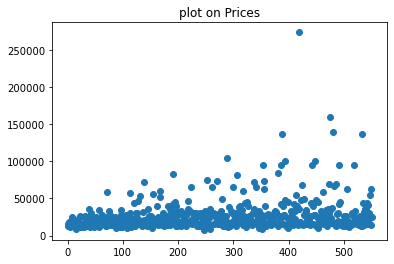

In [454]:
plt.scatter(refridgerator_df.index,refridgerator_df["Price"])
plt.title('plot on Prices');

<AxesSubplot:ylabel='Price'>

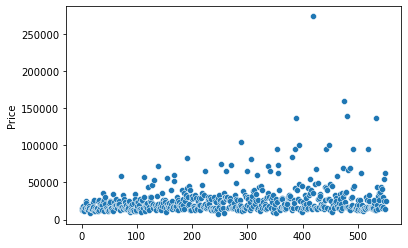

In [478]:
sns.scatterplot(refridgerator_df.index,refridgerator_df['Price'])

### Insights
### Boxplot  is used to find the outliers of the data easily.
### boxplot is used to plot the graph on `Rating` to findout the outliers of the data.
### the dots present before and after the box are the outliers.the range lies between nearly 4.2 to 4.4.

<AxesSubplot:xlabel='Rating'>

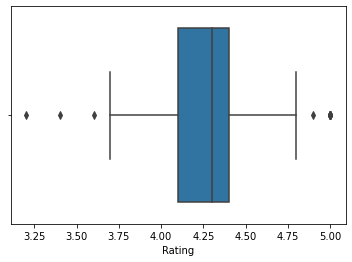

In [429]:
sns.boxplot(refridgerator_df['Rating'])

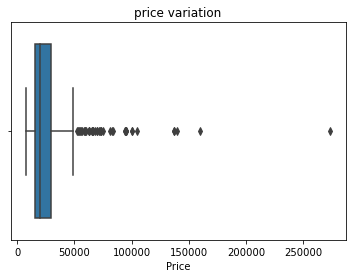

In [18]:
sns.boxplot(refridgerator_df['Price'])
plt.title('price variation');

## Bivariate

### Insights
### The boxplot is drawn to two data coloumns. Bivariate is used to analysis of two data variables to determine the relation between them.
### In this plot we used `Brand` and `Price` for analysis.Overall brands and their prices is shown and some outliers are there in this plot.you can see outliers in the plot. 

### 

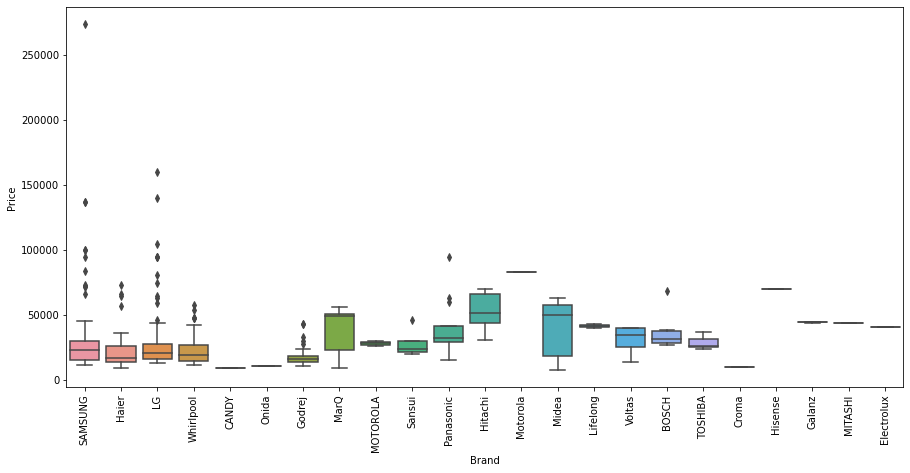

In [430]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
sns.boxplot(x=refridgerator_df.Brand,y=refridgerator_df.Price);

### Insights
### Boxplot is drawn for the`Door_Type` and `Price`.most of the types are `Double door` and `French door`.

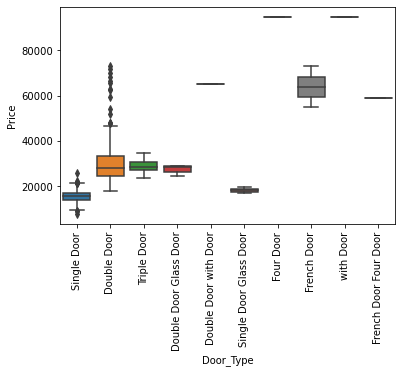

In [431]:
sns.boxplot(x = refridgerator_df["Door_Type"],
            y = refridgerator_df["Price"])
plt.xticks(rotation=90);

### Insights
### scatterplot on three variables `Rating`, `Price` and `Star`. In this plot Rating and Price is compared based on Star.you can the colour difference in the plot. 0-star indicates light colour and 5-star indicates the dark colour.

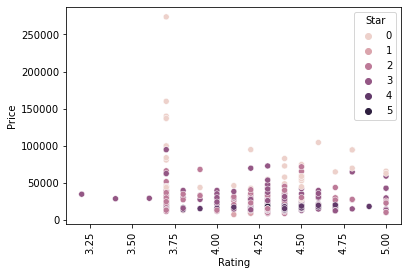

In [432]:
#muitivariate
sns.scatterplot(refridgerator_df["Rating"],refridgerator_df["Price"],hue=refridgerator_df['Star'])
plt.xticks(rotation=90);

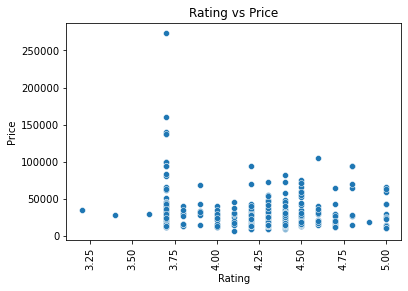

In [458]:
sns.scatterplot(refridgerator_df["Rating"],refridgerator_df["Price"])
plt.title('Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.xticks(rotation=90);

### Insights
### Pie Chart : Diagram consisting of a circle divided into parts to show the size of particular parts in relation.
### In this the  plot is drawn between `Star` and `Price`.the price is shown in percentage inside the graph. the price is divided on basis of star.


In [22]:
data=refridgerator_df.groupby('Star')['Price'].sum()

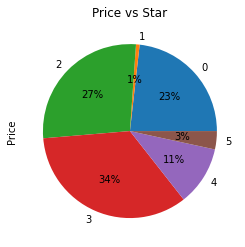

In [24]:
data.plot.pie(autopct="%.0f%%")
plt.title('Price vs Star');

In [35]:
data1=refridgerator_df.groupby('Brand')['Price'].sum()

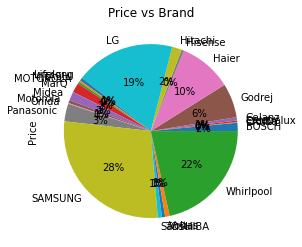

In [36]:
data1.plot.pie(autopct="%.0f%%")
plt.title('Price vs Brand');

### Insights
### Barplot is plotted between `Brand` and `Price`.in this plot shows that `Samsung` has the highest price range and `Electrolux` has the lowest price range.

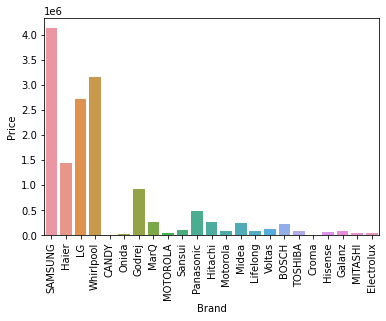

In [436]:
sns.barplot(x="Brand", y="Price", data=refridgerator_df,ci=None,estimator=sum)
plt.xticks(rotation = 90)
plt.show();

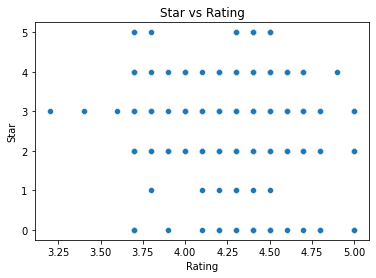

In [19]:
sns.scatterplot(x=refridgerator_df['Rating'],y=refridgerator_df['Star'])
plt.title('Star vs Rating');


In [489]:
# voilin plot

### Insights
### voilin plot : It is the method of showing the numeric data. it is similiar to boxplot.it shows the variation of the price. the price ranges between the (0-50000)mostly.

<AxesSubplot:xlabel='Price'>

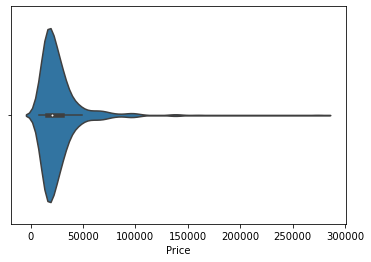

In [10]:
sns.violinplot(refridgerator_df["Price"])

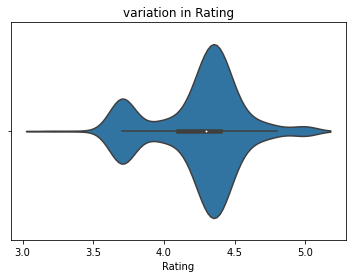

In [28]:
sns.violinplot(refridgerator_df["Rating"])
plt.title('variation in Rating');

### Insights
### Heat Map : It is the representation of data in the form of a map or diagram in which data values are represented as colours.
### In this plot we can see the colour difference of the various data.the lighter colour shows the highest range and dark colour shows the lowest range.

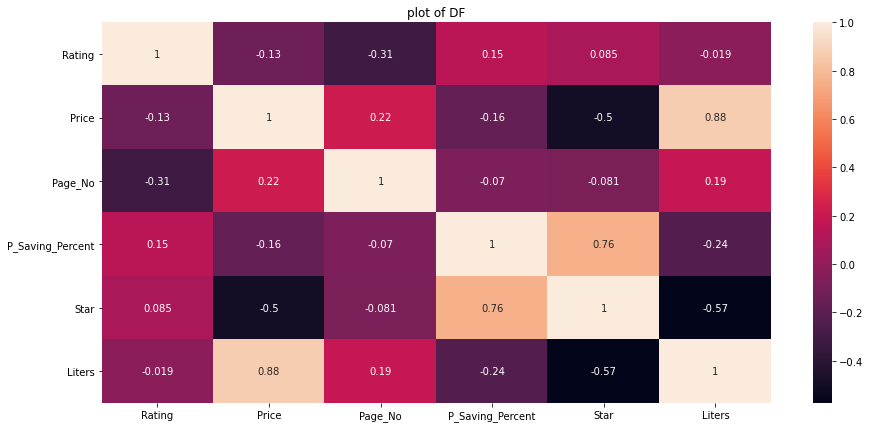

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(refridgerator_df.corr(), annot=True)
plt.title('plot of DF')
plt.show();

### Insights
### Pair plot is used to plot on multiple data in one plot.In this we are showing the three data variables of `Price`, `Star` and `Rating`.you can the differences in each plot.

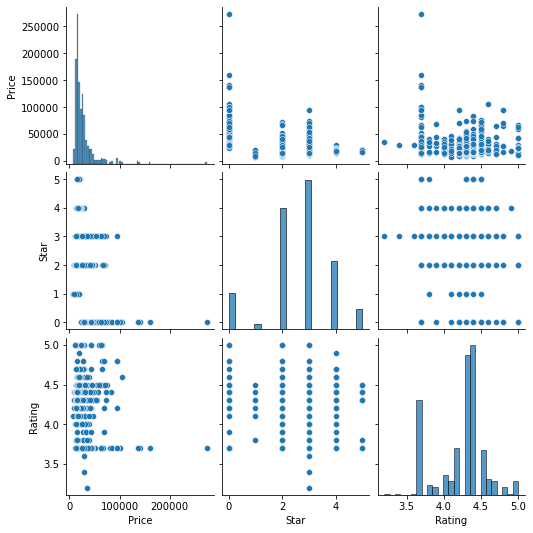

In [460]:
sns.pairplot(data = refridgerator_df, vars=['Price','Star','Rating'])
plt.show();

In [12]:
refridgerator_df.head()

,Product_Name,Rating,Specifications,Price,Page_No,Brand,P_Saving_Percent,Star,Warranty_Years,Door_Type,Liters
0,SAMSUNG 192 L Direct Cool Single Door 2 Star R...,4.3,Linear Compressor2 Star : For Energy savings u...,12290.0,1,SAMSUNG,20,2,10,Single Door,192.0
1,SAMSUNG 198 L Direct Cool Single Door 4 Star R...,4.5,Digital Inverter Compressor4 Star : For Energy...,16150.0,1,SAMSUNG,45,4,10,Single Door,198.0
2,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,4.5,Digital Inverter Compressor5 Star : For Energy...,17590.0,1,SAMSUNG,55,5,10,Single Door,198.0
3,Haier 195 L Direct Cool Single Door 4 Star Ref...,4.4,Reciprocatory Compressor4 Star : For Energy sa...,13440.0,1,Haier,45,4,10,Single Door,195.0
4,LG 190 L Direct Cool Single Door 4 Star Refrig...,4.5,Smart Inverter Compressor4 Star : For Energy s...,15990.0,1,LG,45,4,10,Single Door,190.0


In [13]:
refridgerator_df.groupby(['Brand'], as_index=False).agg({'Price':['min', 'max', 'mean']})

Brand    Price                        
                    min       max          mean
0        BOSCH  26890.0   68299.0  37704.333333
1        CANDY   8999.0    8999.0   8999.000000
2        Croma  10290.0   10290.0  10290.000000
3   Electrolux  40999.0   40999.0  40999.000000
4       Galanz  43990.0   44990.0  44490.000000
5       Godrej  10490.0   42998.0  17956.846154
6        Haier   8999.0   72999.0  22239.676923
7      Hisense  69990.0   69990.0  69990.000000
8      Hitachi  30899.0   69990.0  52641.800000
9           LG  13090.0  159990.0  30559.415730
10    Lifelong  40340.0   42990.0  41665.000000
11     MITASHI  43990.0   43990.0  43990.000000
12    MOTOROLA  26340.0   29990.0  28165.000000
13        MarQ   9499.0   55799.0  37452.285714
14       Midea   7590.0   62990.0  39806.666667
15    Motorola  82999.0   82999.0  82999.000000
16       Onida  10990.0   10990.0  10990.000000
17   Panasonic  15499.0   94956.0  40185.666667
18     SAMSUNG  11590.0  273690.0  29246.950355
19      Sansui  19990.0   46499.0  28367.250000
20     TOSHIBA  23700.0   37000.0  29033.333333
21      Voltas  13499.0   39990.0  30742.250000
22   Whirlpool  11290.0   57990.0  21930.743056

### Insights
### In this plot we are using Barplot.we took two data types `Brand` and `Price`.
###  The plot shows the maximum values of the price in each brand by using **`groupby`** method.

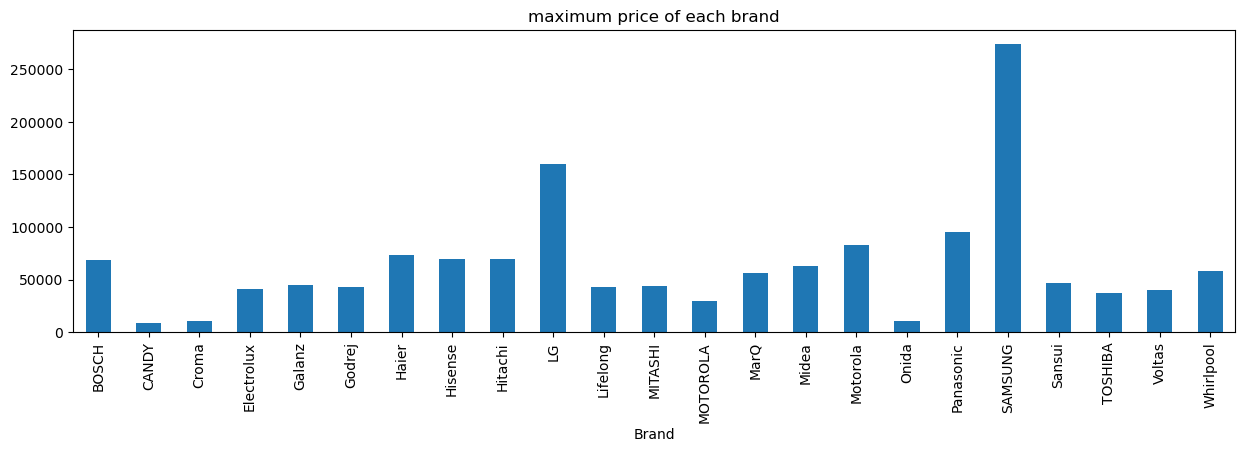

In [33]:
plt.figure(dpi = 100, figsize=(15,4))
refridgerator_df.groupby(['Brand'])['Price'].max().plot(kind = 'bar')
plt.title('maximum price of each brand');

### Insights
### The barplot is drawn between the `Brand` and `Star`.
### This plot shows the maximum star value in each brand. which brand has highest star rating.

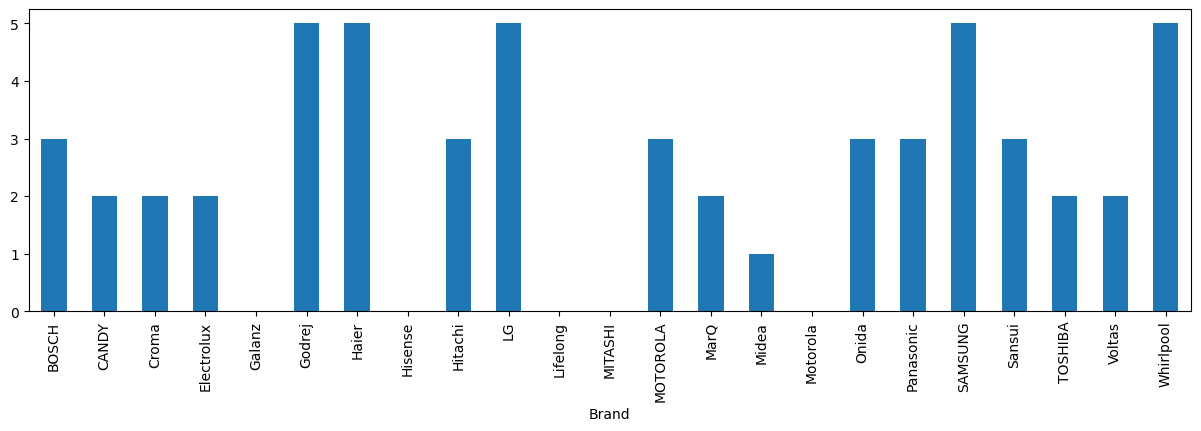

In [446]:
plt.figure(dpi = 100, figsize=(15,4))
refridgerator_df.groupby(['Brand'])['Star'].max().plot(kind = 'bar');

### Insights
### Catplot is  same as barplot. It is a univariate graph.In this we are taking `Brand`.this plot shows colour variation in each brand and counts of each brand.

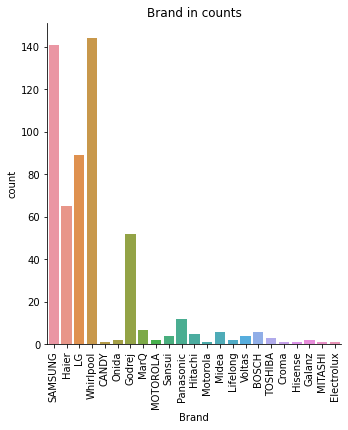

In [469]:
sns.catplot(x='Brand', data=refridgerator_df, kind='count')
plt.title('Brand in counts')
plt.xticks(rotation=90);

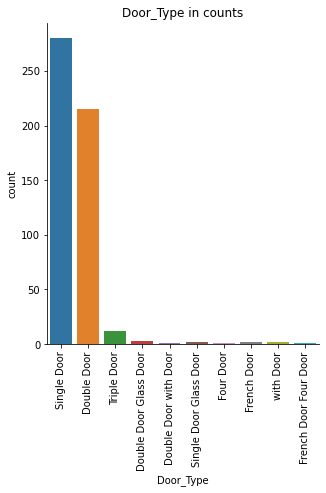

In [14]:
sns.catplot(x='Door_Type', data=refridgerator_df, kind='count')
plt.title('Door_Type in counts')
plt.xticks(rotation=90);

### Insights
### The plot is drawn by using catplot. this plot is drawn between Brand and Price.it shows the brand range  based on the price,which brand is highest and which brand is lowest on prices.

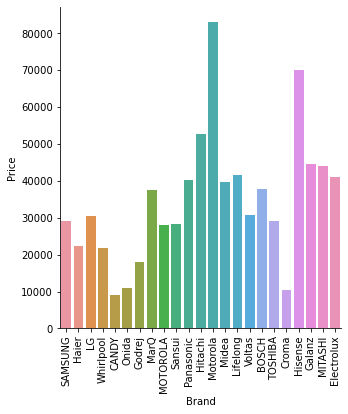

In [467]:
sns.catplot(x='Brand',
            y='Price',
            data=refridgerator_df,
            kind='bar',
            ci=None)

plt.xticks(rotation = 90)
plt.show();